## Bruno Andrade Schiavone
## Barbara Eduarda Rocha
## Pedro Bernardi Alves

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics  as sts
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier

## 1) Resumo geral da base de dados

In [2]:
df=pd.read_csv('adult.csv')
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [6]:
df.shape

(32561, 15)

## 2) Pré-processamento

In [7]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [8]:
df[df == '?'] = np.nan

In [9]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
occupation,1843,5.7
workclass,1836,5.6
native.country,583,1.8
age,0,0.0
fnlwgt,0,0.0


In [10]:
for col in ['workclass', 'occupation', 'native.country']:
   df[col].fillna(df[col].mode()[0], inplace=True)

In [11]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

### Encoding Categorical Features

In [12]:
df.nunique()

age                  73
workclass             8
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           14
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       41
income                2
dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [15]:
df['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [16]:
labelencoder = LabelEncoder()
df[["income","sex", "education"]] = \
df[["income","sex", "education"]].apply(labelencoder.fit_transform)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  int64 
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  int64 
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 3.7+ MB


In [18]:
categorical = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'native.country']
df = pd.get_dummies(df, columns=categorical)

In [19]:
df

,age,fnlwgt,education,education.num,sex,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,90,77053,11,9,0,0,4356,40,0,0,...,0,0,0,0,0,0,0,1,0,0
1,82,132870,11,9,0,0,4356,18,0,0,...,0,0,0,0,0,0,0,1,0,0
2,66,186061,15,10,0,0,4356,40,0,0,...,0,0,0,0,0,0,0,1,0,0
3,54,140359,5,4,0,0,3900,40,0,0,...,0,0,0,0,0,0,0,1,0,0
4,41,264663,15,10,0,0,3900,40,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,15,10,1,0,0,40,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,27,257302,7,12,0,0,0,38,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,40,154374,11,9,1,0,0,40,1,0,...,0,0,0,0,0,0,0,1,0,0
32559,58,151910,11,9,0,0,0,40,0,0,...,0,0,0,0,0,0,0,1,0,0


### Normalização dos dados

In [20]:
df_copy = df.copy()

In [21]:
std=StandardScaler()
columns = ['age','fnlwgt','education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'education' ]
df[columns] =\
std.fit_transform(df[columns])

In [22]:
df.describe()

,age,fnlwgt,education,education.num,sex,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
count,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,32561.000000,3.256100e+04,3.256100e+04,3.256100e+04,32561.000000,32561.000000,...,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,-3.666078e-17,-1.008172e-16,4.102516e-17,1.466431e-16,0.669205,4.189804e-17,-3.491503e-17,-2.793203e-17,0.240810,0.029483,...,0.001136,0.003501,0.000369,0.002457,0.001566,0.000553,0.000584,0.913762,0.002058,0.000491
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,0.470506,1.000015e+00,1.000015e+00,1.000015e+00,0.427581,0.169159,...,0.033691,0.059068,0.019194,0.049507,0.039546,0.023506,0.024149,0.280720,0.045316,0.022162
min,-1.582206e+00,-1.681631e+00,-2.660895e+00,-3.529656e+00,0.000000,-1.459205e-01,-2.166595e-01,-3.194030e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.757679e-01,-6.816910e-01,-3.354369e-01,-4.200596e-01,0.000000,-1.459205e-01,-2.166595e-01,-3.542945e-02,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,-1.159546e-01,-1.082193e-01,1.813316e-01,-3.136003e-02,1.000000,-1.459205e-01,-2.166595e-01,-3.542945e-02,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,6.904838e-01,4.478765e-01,4.397159e-01,7.460392e-01,1.000000,-1.459205e-01,-2.166595e-01,3.695194e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,3.769612e+00,1.226856e+01,1.214869e+00,2.300838e+00,1.000000,1.339458e+01,1.059351e+01,4.742967e+00,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 3) Algoritmos de Classificação
* Árvore de Decisão
* KNN
* Redes Neurais
* K-Means

In [23]:
models = []
models.append(['Decision Tree', DecisionTreeClassifier()])
models.append(['KNN', KNeighborsClassifier(n_neighbors=5)])
models.append(['MLP', MLPClassifier(hidden_layer_sizes=(10,5), activation='relu', solver='sgd', max_iter =800, tol=0.0001, random_state = 3)])

In [24]:
X = df.drop(['income'], axis=1).values
y = df['income'].values

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [26]:
lst_1= []

for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    DT_score = model.score(X_train, y_train)
    DT_test = model.score(X_test, y_test)

    cm = confusion_matrix(y_test,y_pred)
    print(models[m][0],':')
    print('Training Score',DT_score)
    print('Testing Score \n',DT_test)
    print(cm)
    print('-----------------------------------')
    lst_2.append(models[m][0])
    lst_2.append(DT_score)
    lst_2.append(DT_test)
    lst_1.append(lst_2)

Decision Tree :
Training Score 0.999956124956125
Testing Score 
 0.8145153035111066
[[6475  922]
 [ 890 1482]]
-----------------------------------
KNN :
Training Score 0.8791681291681291
Testing Score 
 0.8385709898659024
[[6751  646]
 [ 931 1441]]
-----------------------------------
MLP :
Training Score 0.8553001053001053
Testing Score 
 0.8578155389497389
[[6905  492]
 [ 897 1475]]
-----------------------------------


In [27]:
df_compare = pd.DataFrame(lst_1, columns= ['Model', 'Training Score', 'Testing Score'])
df_compare

,Model,Training Score,Testing Score
0,Decision Tree,0.999956,0.814515
1,KNN,0.879168,0.838571
2,MLP,0.855300,0.857816


### K-Means

**Erro Mínimos Quadrados**

In [28]:
df_K = df.drop('income', axis=1)

In [29]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(df_K[['age','education']])
    # inertia: Método para gerar o wcss
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [30]:
wcss

[65122.000000000335,
 42886.91863615351,
 26741.452969445756,
 20340.577884400926,
 16197.99200090575,
 12826.012684261126,
 10310.77805418053,
 8981.880640855929,
 7894.745667679277,
 7028.826778422109,
 6302.476566979283,
 5603.4606724818095,
 5090.686261670233,
 4689.003813146657]

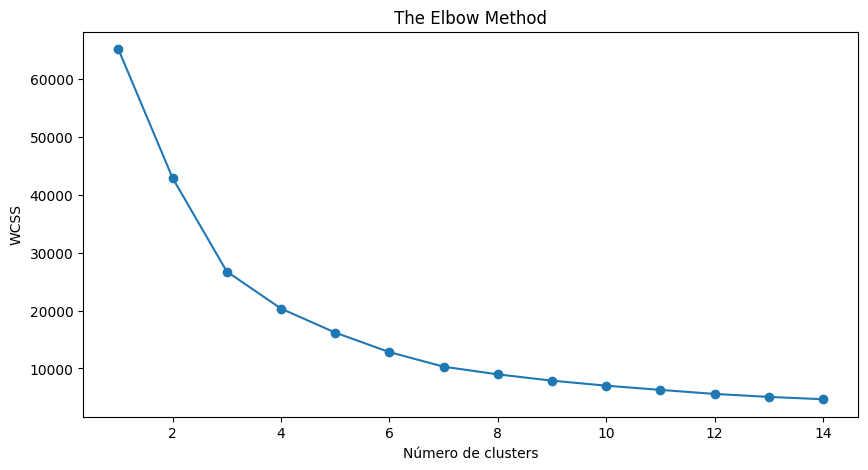

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
plt.plot(range(1,15),wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

**Agrupamento**

In [32]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 5, max_iter = 300)
kmeans1 = kmeans.fit(df_K[['age','education']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
import plotly.express as px
centroids = kmeans1.cluster_centers_
classification = kmeans1.labels_
graph = px.scatter(x = df_K['age'], y = df_K['education'], color=classification)
graph.show()

In [34]:
#SepalLengthCm x PetalLengthCm
import plotly.graph_objects as go

graf1 = px.scatter(x = df_K['age'], y = df_K['education'], color=classification)
graf2 = px.scatter(x = centroids[:,0], y = centroids[:,1], size = [10, 10, 10, 10])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means')
graf3.update_xaxes(title = 'x')
graf3.update_yaxes(title = 'y')
graf3.show()

In [35]:
# Adiciona a coluna cluster
df_copy['cluster'] = kmeans1.labels_
df_copy.head()

,age,fnlwgt,education,education.num,sex,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,...,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,cluster
0,90,77053,11,9,0,0,4356,40,0,0,...,0,0,0,0,0,0,1,0,0,1
1,82,132870,11,9,0,0,4356,18,0,0,...,0,0,0,0,0,0,1,0,0,1
2,66,186061,15,10,0,0,4356,40,0,0,...,0,0,0,0,0,0,1,0,0,1
3,54,140359,5,4,0,0,3900,40,0,0,...,0,0,0,0,0,0,1,0,0,1
4,41,264663,15,10,0,0,3900,40,0,0,...,0,0,0,0,0,0,1,0,0,2


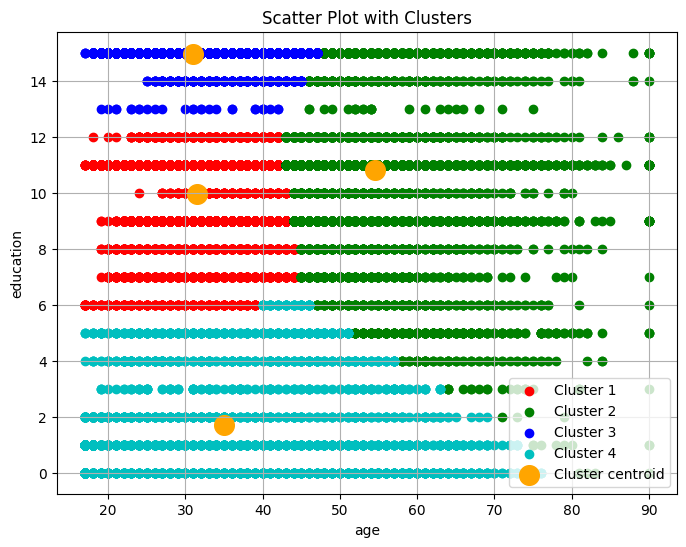

In [36]:
colors = ['r', 'g', 'b', 'c']


# Create the scatter plot with different colors for each cluster
plt.figure(figsize=(8, 6))
for i in range(4):
    cluster_data = df_copy[df_copy['cluster'] == i]
    plt.scatter(cluster_data['age'], cluster_data['education'], c=colors[i], label=f'Cluster {i+1}')
    if i == 3:  # Add the centroid legend entry only for the first cluster
        plt.scatter(cluster_data['age'].mean(), cluster_data['education'].mean(), s=200, c='orange', marker='o', label='Cluster centroid')
    else:
        plt.scatter(cluster_data['age'].mean(), cluster_data['education'].mean(), s=200, c='orange', marker='o')

plt.xlabel('age')
plt.ylabel('education')
plt.title('Scatter Plot with Clusters')
plt.legend()
plt.grid(True)
plt.show()

## 4) validação cruzada

In [37]:
from sklearn.model_selection import StratifiedKFold

In [38]:
lst_1= []

for m in range(len(models)):
  lst_2= []
  model = models[m][1]
  # Create StratifiedKFold object.
  skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
  lst_accu_stratified = []

  for train_index, test_index in skf.split(X, y):
      x_train_fold, x_test_fold = X[train_index], X[test_index]
      y_train_fold, y_test_fold = y[train_index], y[test_index]
      model.fit(x_train_fold, y_train_fold)
      lst_accu_stratified.append(model.score(x_test_fold, y_test_fold))

  # Print the output.
  print(models[m][0],':')
  print('\nLista de ACC:', lst_accu_stratified)
  print('\nMaior ACC:',
        max(lst_accu_stratified)*100, '%')
  print('\nMenor ACC:',
        min(lst_accu_stratified)*100, '%')
  print('\nMédia ACC:',
        sts.mean(lst_accu_stratified)*100, '%')
  print('\nDesvio Padrão:', sts.stdev(lst_accu_stratified))
  print('-----------------------------------')
  lst_2.append(models[m][0])
  lst_2.append(max(lst_accu_stratified)*100)
  lst_2.append(min(lst_accu_stratified)*100)
  lst_2.append(sts.mean(lst_accu_stratified)*100)
  lst_2.append(sts.stdev(lst_accu_stratified))
  lst_1.append(lst_2)


Decision Tree :

Lista de ACC: [0.8216149831132944, 0.8194103194103194, 0.8203316953316954, 0.8105036855036855, 0.8218673218673219, 0.8135749385749386, 0.8135749385749386, 0.8203316953316954, 0.8154176904176904, 0.8181818181818182]

Maior ACC: 82.18673218673219 %

Menor ACC: 81.05036855036855 %

Média ACC: 81.74809086307397 %

Desvio Padrão: 0.00394758405450171
-----------------------------------
KNN :

Lista de ACC: [0.8449493398833282, 0.832002457002457, 0.8286240786240786, 0.8289312039312039, 0.8329238329238329, 0.835995085995086, 0.8347665847665847, 0.8230958230958231, 0.8445945945945946, 0.8332309582309583]

Maior ACC: 84.49493398833282 %

Menor ACC: 82.30958230958231 %

Média ACC: 83.39113959047947 %

Desvio Padrão: 0.006797524296142586
-----------------------------------
MLP :

Lista de ACC: [0.8645993245317777, 0.8544226044226044, 0.8581081081081081, 0.8516584766584766, 0.8562653562653563, 0.8547297297297297, 0.8544226044226044, 0.8516584766584766, 0.8624078624078624, 0.8559582

In [39]:
df_compare = pd.DataFrame(lst_1, columns= ['Model', 'Maior ACC', 'Menor ACC', 'Média ACC', 'Desvio Padrão' ])
df_compare

,Model,Maior ACC,Menor ACC,Média ACC,Desvio Padrão
0,Decision Tree,82.186732,81.050369,81.748091,0.003948
1,KNN,84.494934,82.309582,83.391140,0.006798
2,MLP,86.459932,85.165848,85.642308,0.004243


## 5) Balanceamento das classes
- https://medium.com/analytics-vidhya/undersampling-and-oversampling-an-old-and-a-new-approach-4f984a0e8392
* Abordagem SMOTE

In [40]:
df['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
lst_1= []

for m in range(len(models)):
  lst_2= []
  model = models[m][1]
  # Create StratifiedKFold object.
  skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
  lst_accu_stratified = []

  for train_index, test_index in skf.split(X, y):
      x_train_fold, x_test_fold = X[train_index], X[test_index]
      y_train_fold, y_test_fold = y[train_index], y[test_index]
      sm = SMOTE()
      x_train_oversampled, y_train_oversampled = sm.fit_resample(x_train_fold, y_train_fold)
      model.fit(x_train_oversampled, y_train_oversampled)
      lst_accu_stratified.append(model.score(x_test_fold, y_test_fold))
  # Print the output.
  print(models[m][0],':')
  print('\nLista de ACC:', lst_accu_stratified)
  print('\nMaior ACC:',
        max(lst_accu_stratified)*100, '%')
  print('\nMenor ACC:',
        min(lst_accu_stratified)*100, '%')
  print('\nMédia ACC:',
        sts.mean(lst_accu_stratified)*100, '%')
  print('\nDesvio Padrão:', sts.stdev(lst_accu_stratified))
  print('-----------------------------------')
  lst_2.append(models[m][0])
  lst_2.append(max(lst_accu_stratified)*100)
  lst_2.append(min(lst_accu_stratified)*100)
  lst_2.append(sts.mean(lst_accu_stratified)*100)
  lst_2.append(sts.stdev(lst_accu_stratified))
  lst_1.append(lst_2)

Decision Tree :

Lista de ACC: [0.8136321768498619, 0.8083538083538083, 0.8025184275184275, 0.8019041769041769, 0.8058968058968059, 0.8175675675675675, 0.8062039312039312, 0.7862407862407862, 0.8071253071253072, 0.8028255528255528]

Maior ACC: 81.75675675675676 %

Menor ACC: 78.62407862407862 %

Média ACC: 80.52268540486224 %

Desvio Padrão: 0.008315587238904425
-----------------------------------
KNN :

Lista de ACC: [0.789376727049432, 0.788083538083538, 0.788083538083538, 0.7871621621621622, 0.7917690417690417, 0.7813267813267813, 0.7994471744471745, 0.7794840294840295, 0.789004914004914, 0.7862407862407862]

Maior ACC: 79.94471744471745 %

Menor ACC: 77.94840294840296 %

Média ACC: 78.79978692651397 %

Desvio Padrão: 0.005467205528439763
-----------------------------------
MLP :

Lista de ACC: [0.8130181148295977, 0.8114250614250614, 0.8230958230958231, 0.808968058968059, 0.812960687960688, 0.8132678132678133, 0.8234029484029484, 0.8111179361179361, 0.8286240786240786, 0.8114250614

In [43]:
df_compare = pd.DataFrame(lst_1, columns= ['Model', 'Maior ACC', 'Menor ACC', 'Média ACC', 'Desvio Padrão' ])
df_compare

,Model,Maior ACC,Menor ACC,Média ACC,Desvio Padrão
0,Decision Tree,81.756757,78.624079,80.522685,0.008316
1,KNN,79.944717,77.948403,78.799787,0.005467
2,MLP,82.862408,80.896806,81.573056,0.006704


## 6) Técnicas de ajuste de hiperparâmetros
- https://scikit-learn.org/stable/modules/grid_search.html#
- Abordagens disponíveis no scikit-learn:
    - GridSearchCV: considera exaustivamente todas as combinações de parâmetros;
    - RandomizedSearchCV: pesquisa aleatória de parâmetros, em que cada configuração é amostrada a partir de uma distribuição de possíveis valores de parâmetro.

In [44]:
models.pop(2)

['MLP',
 MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=800, random_state=3,
               solver='sgd')]

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [46]:
def grid_search(estimator, param_grid, cv, return_train_score):
  return GridSearchCV(estimator=estimator, param_grid=param_grid, refit=True, cv=cv, return_train_score=return_train_score, n_jobs=-1)

In [47]:
def randomized_search(estimator, param_grid, cv, return_train_score):
  return RandomizedSearchCV(estimator=estimator, param_distributions=param_grid,refit=True,n_iter= 10, cv=cv, return_train_score=return_train_score, n_jobs=-1)

In [48]:
estimators = []
estimators.append(['GridSearchCV', grid_search])
estimators.append(['RandomizedSearchCV', randomized_search])

In [49]:
models_param_grid = {
    'Decision Tree' : {'criterion': ['gini', 'entropy', 'log_loss']},
    'KNN': {'n_neighbors': [3,5,7,9], 'metric':['euclidean', 'manhattan', 'cosine','minkowski']},
    'MLP': {'hidden_layer_sizes': [(10,30,10),(20,)], 'activation': ['tanh', 'relu'], 'solver': ['sgd', 'adam'], 'alpha': [0.0001, 0.05], 'learning_rate': ['constant','adaptive'],}
}

In [50]:
lst_1= []

for m in range(len(models)):
  model = models[m][1]
  print(models[m][0],':')
  for n in range(len(estimators)):
    lst_2= []
    estimator = estimators[n][1]
    e_search = estimator(model, models_param_grid[models[m][0]], 10, False)
    sm = SMOTE()
    x_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
    e_search.fit(x_train_oversampled, y_train_oversampled)
    print('-------')
    print(estimators[n][0],':')
    print(e_search.best_params_)
    print(e_search.best_score_)
    print(e_search.best_index_)
    print(e_search.cv_results_.keys())
    g_results =  pd.DataFrame(e_search.cv_results_)
    # Obtém a média das acurácias (10 folds) referente ao conjunto treino
    mean_test_score = g_results.loc[e_search.best_index_,'mean_test_score']
    print(mean_test_score)
    # Avalia o conjunto teste  com o melhor conjunto de parâmetros encontrado
    # best_estimator_ .Para tanto, o parâmetro refit precisa ser igual a True
    model = e_search.best_estimator_
    score = model.score(X_test,y_test)
    print(score)
    print('-------')
    lst_2.append(f'{models[m][0]}({estimators[n][0]})')
    lst_2.append(e_search.best_params_)
    lst_2.append(e_search.best_score_)
    lst_2.append(e_search.best_index_)
    lst_2.append(mean_test_score)
    lst_2.append(score)
    lst_1.append(lst_2)
  print('-----------------------------------')

Decision Tree :
-------
GridSearchCV :
{'criterion': 'log_loss'}
0.8599296911710306
2
dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_criterion', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])
0.8599296911710306
0.8037670181185382
-------


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.



-------
RandomizedSearchCV :
{'criterion': 'log_loss'}
0.858342697846162
2
dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_criterion', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])
0.858342697846162
0.8085781553894974
-------
-----------------------------------
KNN :
-------
GridSearchCV :
{'metric': 'manhattan', 'n_neighbors': 3}
0.8858752903498861
4
dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_metric', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 

In [51]:
df_compare = pd.DataFrame(lst_1, columns= ['Model', 'best_params_', 'best_score_','best_index_', 'mean_test_score','score' ])
df_compare

,Model,best_params_,best_score_,best_index_,mean_test_score,score
0,Decision Tree(GridSearchCV),{'criterion': 'log_loss'},0.859930,2,0.859930,0.803767
1,Decision Tree(RandomizedSearchCV),{'criterion': 'log_loss'},0.858343,2,0.858343,0.808578
2,KNN(GridSearchCV),"{'metric': 'manhattan', 'n_neighbors': 3}",0.885875,4,0.885875,0.806428
3,KNN(RandomizedSearchCV),"{'n_neighbors': 3, 'metric': 'manhattan'}",0.884865,0,0.884865,0.805712
